<a href="https://colab.research.google.com/github/shraddha-ship-it/Loan-Approval/blob/main/Loan_Approval_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
loan_dataset=pd.read_csv('dataset.csv')

In [5]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_dataset['LoanAmount']=loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].median())

In [ ]:
loan_dataset['']=loan_dataset['ApplicantIncome'].fillna(loan_dataset['ApplicantIncome'].median())

In [ ]:
loan_dataset['']=loan_dataset['CoapplicantIncome'].fillna(loan_dataset['CoapplicantIncome'].median())

In [ ]:
loan_dataset.dropna(inplace=True)

In [ ]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
                     0
dtype: int64

In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,5336.128257,1566.995832,144.098196,342.012024,0.851703,1566.995832
std,5618.157076,2580.954598,79.022494,64.860368,0.355750,2580.954598
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2885.500000,0.000000,101.500000,360.000000,1.000000,0.000000
50%,3859.000000,1086.000000,128.000000,360.000000,1.000000,1086.000000
75%,5825.000000,2251.500000,166.500000,360.000000,1.000000,2251.500000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,33837.000000


In [ ]:
loan_dataset.Loan_Amount_Term.unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

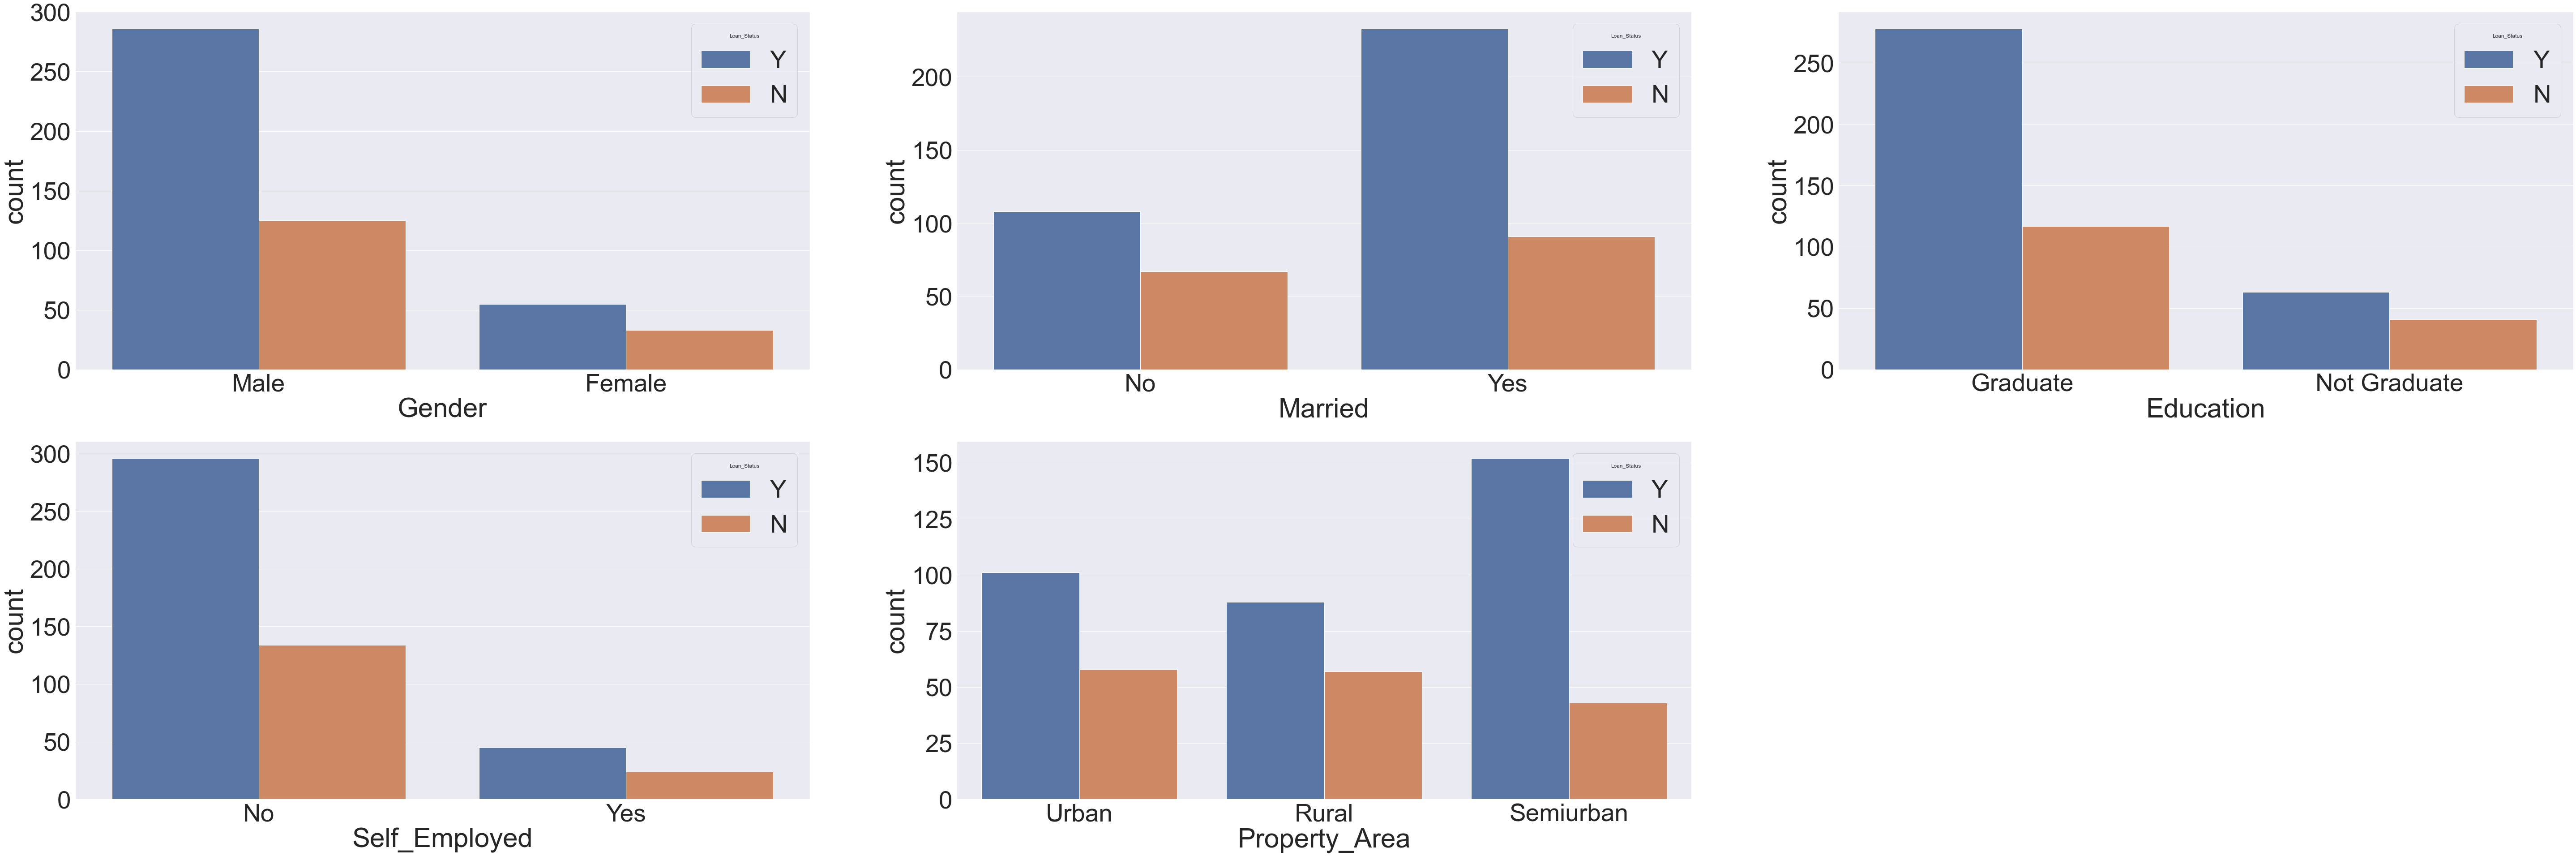

In [ ]:
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(loan_dataset['Gender'],hue=loan_dataset['Loan_Status'])

plt.subplot(332)
sns.countplot(loan_dataset['Married'],hue=loan_dataset['Loan_Status'])

plt.subplot(333)
sns.countplot(loan_dataset['Education'],hue=loan_dataset['Loan_Status'])

plt.subplot(334)
sns.countplot(loan_dataset['Self_Employed'],hue=loan_dataset['Loan_Status'])

plt.subplot(335)
sns.countplot(loan_dataset['Property_Area'],hue=loan_dataset['Loan_Status'])


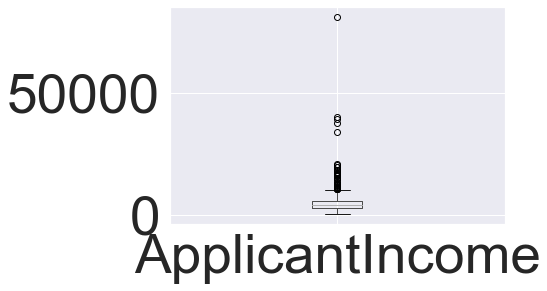

In [ ]:
loan_dataset.boxplot(column='ApplicantIncome')

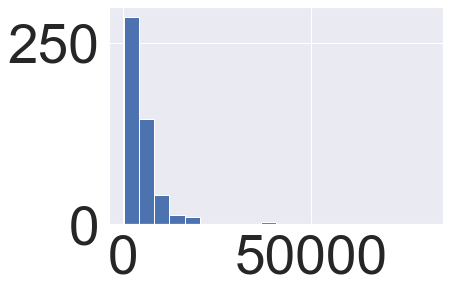

In [ ]:
loan_dataset['ApplicantIncome'].hist(bins=20)

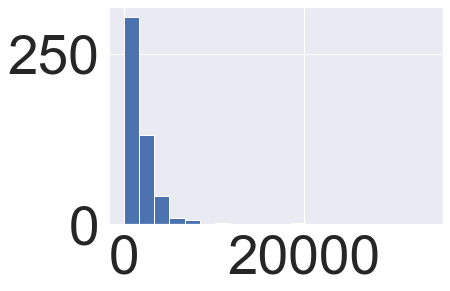

In [ ]:
loan_dataset['CoapplicantIncome'].hist(bins=20)

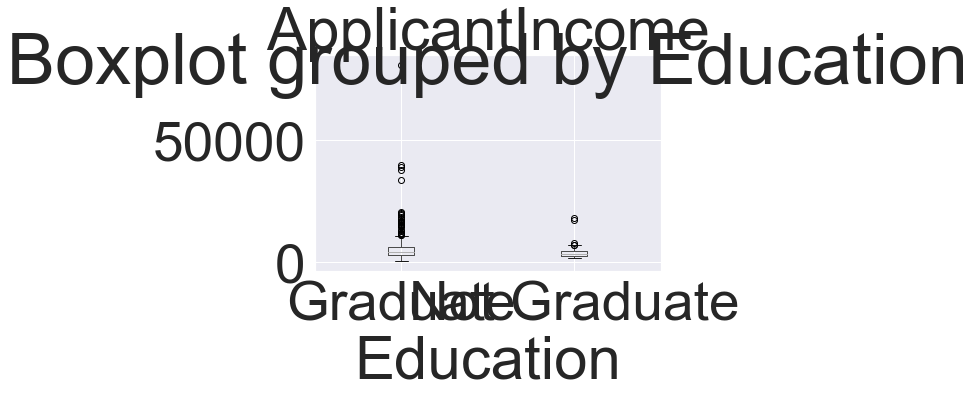

In [ ]:
loan_dataset.boxplot(column='ApplicantIncome',by='Education')

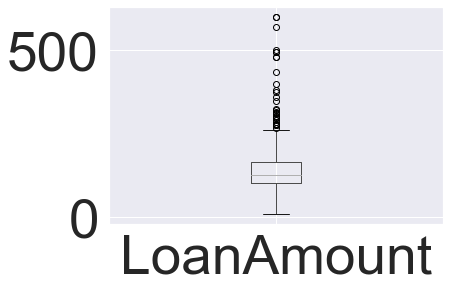

In [ ]:
loan_dataset.boxplot(column='LoanAmount')

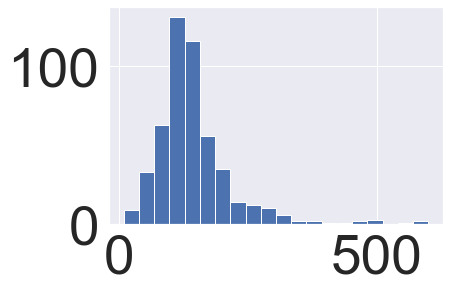

In [ ]:
loan_dataset['LoanAmount'].hist(bins=20)

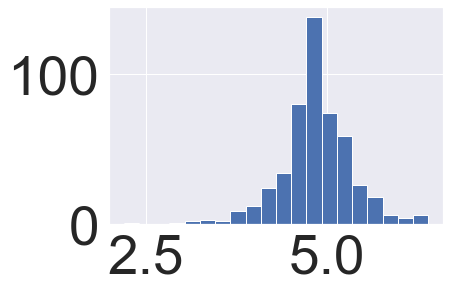

In [ ]:
loan_dataset['LoanAmount_log']=np.log(loan_dataset['LoanAmount'])
loan_dataset['LoanAmount_log'].hist(bins=20)

In [ ]:
loan_dataset['TotalIncome']=loan_dataset['ApplicantIncome']+loan_dataset['CoapplicantIncome']
loan_dataset['TotalIncome_log']=np.log(loan_dataset['TotalIncome'])

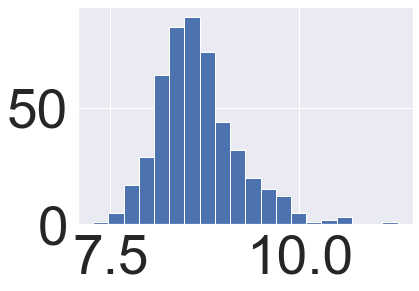

In [ ]:
loan_dataset['TotalIncome_log'].hist(bins=20)

In [ ]:
loan_dataset["Loan_Status"]=loan_dataset["Loan_Status"].replace({"Y":1})
loan_dataset["Loan_Status"]=loan_dataset["Loan_Status"].replace({"N":0})

loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

loan_dataset["Education"]=loan_dataset["Education"].replace({"Graduate":1})
loan_dataset["Education"]=loan_dataset["Education"].replace({"Not Graduate":0})

loan_dataset["Married"]=loan_dataset["Married"].replace({"Yes":1})
loan_dataset["Married"]=loan_dataset["Married"].replace({"No":0})

loan_dataset["Gender"]=loan_dataset["Gender"].replace({"Male":1})
loan_dataset["Gender"]=loan_dataset["Gender"].replace({"Female":0})

loan_dataset["Self_Employed"]=loan_dataset["Self_Employed"].replace({"Yes":1})
loan_dataset["Self_Employed"]=loan_dataset["Self_Employed"].replace({"No":0})

loan_dataset["Property_Area"]=loan_dataset["Property_Area"].replace({"Rural":0})
loan_dataset["Property_Area"]=loan_dataset["Property_Area"].replace({"Semiurban":1})
loan_dataset["Property_Area"]=loan_dataset["Property_Area"].replace({"Urban":2})

In [ ]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,0.0,4.852030,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1508.0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,0.0,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,2358.0,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0.0,4.948760,6000.0,8.699515
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,4196.0,5.587249,9613.0,9.170872
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1,1516.0,4.553877,3849.0,8.255569
7,LP001014,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0,2504.0,5.062595,5540.0,8.619750
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1,1526.0,5.123964,5532.0,8.618305
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0,10968.0,5.855072,23809.0,10.077819


In [ ]:
loan_dataset.TotalIncome_log.unique()

array([ 8.67402599,  8.71456755,  8.00636757,  8.50532302,  8.69951475,
        9.17087163,  8.25556865,  8.61974978,  8.61830469, 10.07781894,
        8.26873183,  9.3217923 ,  8.45382732,  7.7769544 ,  8.50714286,
        8.16337132,  8.4943339 ,  8.94376726,  9.35703475,  8.41427414,
        9.16534301,  8.52753948,  8.56902634,  7.27378632,  8.06054005,
        8.45361421,  8.55004753,  9.6485953 ,  8.37609035,  8.54208091,
        9.33926115,  8.59711281,  8.18868912,  8.01069154,  8.74464744,
        8.63923382,  8.66922735,  8.71358201,  8.74432876,  8.18088094,
        8.03463103,  8.34995727,  8.43728381,  9.35010231,  8.26230094,
        8.22228507,  8.62443194,  9.24280756,  8.73488189,  8.74766979,
        8.01598781,  8.70913499,  8.50613224,  8.33471162,  9.24193593,
        8.60410456,  9.28266103,  8.86785006,  8.3663703 ,  8.74416939,
        8.22951112,  8.16051825,  8.85936345,  9.04782144,  8.29953457,
        8.87724244,  8.25478893,  7.78113851,  8.08917568,  8.29

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome',''],axis=1)
Y=loan_dataset['Loan_Status']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,1,0,0,1,0,360.0,1.0,2,4.852030,8.674026
1,1,1,1,1,0,360.0,1.0,0,4.852030,8.714568
2,1,1,0,1,1,360.0,1.0,2,4.189655,8.006368
3,1,1,0,0,0,360.0,1.0,2,4.787492,8.505323
4,1,0,0,1,0,360.0,1.0,2,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,360.0,1.0,0,4.262680,7.972466
610,1,1,4,1,0,180.0,1.0,0,3.688879,8.320205
611,1,1,1,1,0,360.0,1.0,2,5.533389,9.025456
612,1,1,2,1,0,360.0,1.0,2,5.231109,8.933664


In [ ]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log',
       'TotalIncome_log'],
      dtype='object')

In [ ]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 499, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

lr_prediction=model.predict(X_test)
print('Logistic Regression Accuracy Is:',metrics.accuracy_score(lr_prediction,Y_test))

Logistic Regression Accuracy Is: 0.86


In [ ]:
print("Y_Predicted",lr_prediction)
print("Y_Test",Y_test)

Y_Predicted [1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1]
Y_Test 39     1
356    1
479    0
534    1
271    1
476    1
264    1
53     0
14     1
6      1
291    0
241    0
590    1
504    1
177    0
275    1
595    1
329    1
208    1
128    0
88     1
498    1
369    0
589    0
22     0
71     1
233    1
280    0
352    1
382    1
439    1
450    0
166    0
255    1
244    1
96     1
93     1
404    0
144    1
400    0
66     0
375    1
607    1
189    1
148    0
388    1
528    1
557    1
398    1
213    1
Name: Loan_Status, dtype: int64


In [ ]:
model.intercept_

array([-0.02296727])

In [ ]:
model.coef_

array([[ 9.12362264e-02,  6.07304126e-01,  3.72297976e-02,
         5.85057109e-01, -1.18084214e-01, -6.03118404e-04,
         2.90510824e+00, -1.79374532e-02, -3.72761878e-01,
        -6.37480866e-02]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,Y_train)

GaussianNB()

In [ ]:
Y_pred=NBClassifier.predict(X_test)

In [ ]:
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
print('The Accuracy Of Naive Bayes Algorithm Is',metrics.accuracy_score(Y_pred,Y_test))

The Accuracy Of Naive Bayes Algorithm Is 0.84


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [6]:
pickle.dump(NBClassifier,open('NBClassifier_model.pkl','wb'))

NameError: name 'pickle' is not defined

In [7]:
import streamlit as st
import pickle

# Load the model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Title
st.title("Loan Approval Prediction")

# User inputs
gender = st.selectbox('Gender', ['Male', 'Female'])
marital_status = st.selectbox('Married', ['Yes', 'No'])
dependents = st.number_input('Number of Dependents', min_value=0, max_value=10)
education = st.selectbox('Education Level', ['Graduate', 'Not Graduate'])
income = st.number_input('Applicant Income')
loan_amount = st.number_input('Loan Amount')

# Make predictions
if st.button("Predict"):
    prediction = model.predict([[gender, marital_status, dependents, education, income, loan_amount]])
    st.success(f"Loan Approval Status: {'Approved' if prediction[0] == 1 else 'Not Approved'}")


ModuleNotFoundError: No module named 'streamlit'